# Reading files 

In [1]:
# import libraries
import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore", category=Warning, )

In [2]:
# create train dataframe 
train_df = pd.read_csv('/Users/matheusmaciel/CASS/MSc 2021-22 /Term 3/NLP/nlp_fcp/data/train.csv')

# create test dataframe
test_df = pd.read_csv('/Users/matheusmaciel/CASS/MSc 2021-22 /Term 3/NLP/nlp_fcp/data/test.csv')

# view train dataframe
train_df.head()

,helpfulness_cat,imdb_user_review
0,1.0,It is hard to find such delightful and adorabl...
1,1.0,"They don't make films like this faded, hauntin..."
2,1.0,I first viewed this movie in 1924 at age 6 yrs...
3,1.0,I doubt that I'd ever seen anything resembling...
4,1.0,I was shocked to find myself riveted to this m...


# Exploratory data analysis

In [3]:
# describe train data
train_df.describe()

,helpfulness_cat
count,10755.000000
mean,0.763738
std,0.424805
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


1.0    8214
0.0    2541
Name: helpfulness_cat, dtype: int64


<AxesSubplot:xlabel='helpfulness_cat', ylabel='count'>

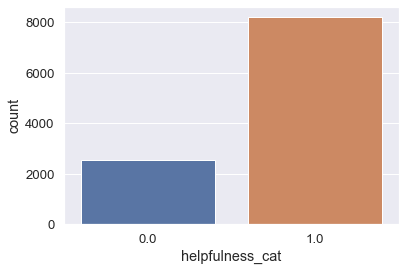

In [4]:
# get distribution of 'helpfulness_cat' column 
print(train_df['helpfulness_cat'].value_counts())  # 1 helpful review, 0 unhelpful 

#plot 
sns.set(style = "darkgrid" , font_scale = 1.2)
sns.countplot(train_df.helpfulness_cat)

Most reviews are considered helpful 

In [5]:
# get average length of text in 'imdb_user_review' column depending on if 'helpfulness_cat' == 1.0 or 0.0
train_df.groupby('helpfulness_cat').imdb_user_review.apply(lambda x: x.str.len().mean())

helpfulness_cat
0.0     749.332153
1.0    1066.435476
Name: imdb_user_review, dtype: float64

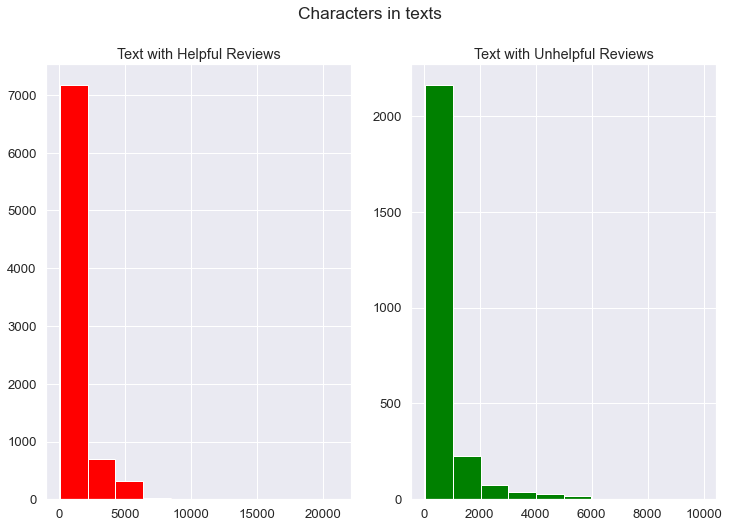

In [6]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=train_df[train_df['helpfulness_cat']==1]['imdb_user_review'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Text with Helpful Reviews')
text_len=train_df[train_df['helpfulness_cat']==0]['imdb_user_review'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Text with Unhelpful Reviews')
fig.suptitle('Characters in texts')
plt.show()

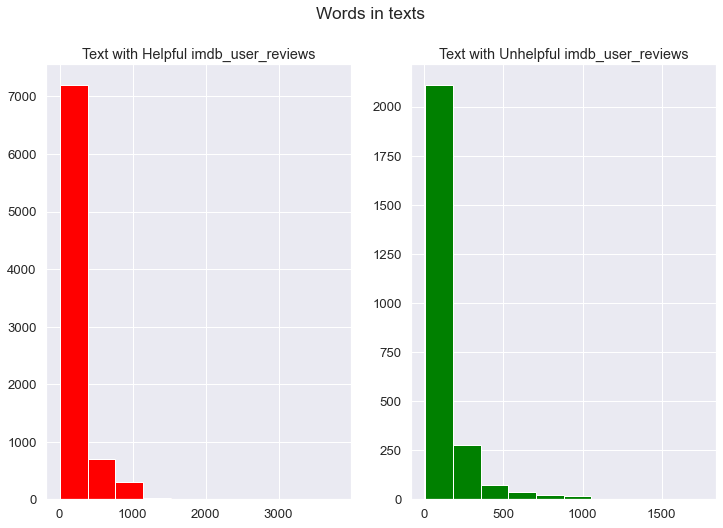

In [7]:
# plotting number of words in text
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=train_df[train_df['helpfulness_cat']==1]['imdb_user_review'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Text with Helpful imdb_user_reviews')
text_len=train_df[train_df['helpfulness_cat']==0]['imdb_user_review'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Text with Unhelpful imdb_user_reviews')
fig.suptitle('Words in texts')
plt.show()

On average, helpful reviews are longer than unhelpful ones 

# Data Pre-processing for NLP

Tokenize, lemmatize, etc


In [8]:
# import libraries
# nlp text pre-processing
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [9]:
# define function for pre-processing
def pre_process(text):
    # lowercase
    text = text.lower()
    # remove punctuation and special characters
    text = re.sub('[^a-zA-Z]', ' ', text)
    # # remove punctuation
    # text = re.sub('\[.*?\]', '', text)
    # remove numbers
    text = re.sub(r'\d+', '', text)
    # remove stopwords
    text = ' '.join([word for word in text.split() if word not in stopwords])
    # lemmatize
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    return text


# apply pre-processing to train data
train_df['imdb_user_review'] = train_df['imdb_user_review'].apply(pre_process)

# view train dataframe
train_df.head()

,helpfulness_cat,imdb_user_review
0,1.0,hard find delightful adorable movie day kid si...
1,1.0,make film like faded haunting masterpiece sile...
2,1.0,first viewed movie age yr probably first movie...
3,1.0,doubt ever seen anything resembling complete v...
4,1.0,shocked find riveted movie without doubt best ...


# Modelling - Vectorization

In [10]:
# train and test data
y = train_df.iloc[:,0]
X = train_df.iloc[:,1]

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Count

In [11]:
# vectorize train data
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2))
X_train_vect = vectorizer.fit_transform(X_train)

## Tf-idf

In [12]:
# applying tf-idf to train data
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)

## Logistic regression

In [13]:
# logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

## Decision tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()

## Naive Bayes

In [15]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()

## Model evaluation

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.metrics import accuracy_score


In [ ]:
# evaluating vectorized model
models = []
models.append(('Logistic Regression', logreg))
models.append(('Decision Tree', dec_tree))
models.append(('Naive Bayes', naive_bayes))

# cross validation
seed = 5

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train_vect, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
# evaluating tfidf models
models = []
models.append(('Logistic Regression', logreg))
models.append(('Decision Tree', dec_tree))
models.append(('Naive Bayes', naive_bayes))

# cross validation
seed = 5

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train_tfidf, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Modelling - Word Embedding

source: https://www.kaggle.com/code/nagasai524/movie-review-sentiment-analysis-using-word2vec-knn

In [27]:
# Load word2vec algorithm from gensim
from gensim.models import Word2Vec,KeyedVectors

,helpfulness_cat,imdb_user_review
0,1.0,"[hard, find, delightful, adorable, movie, day,..."
1,1.0,"[make, film, like, faded, haunting, masterpiec..."
2,1.0,"[first, viewed, movie, age, yr, probably, firs..."
3,1.0,"[doubt, ever, seen, anything, resembling, comp..."
4,1.0,"[shocked, find, riveted, movie, without, doubt..."


In [45]:
from tqdm import tqdm

words_in_sentences=[]
for i in tqdm(X_train):
    words_in_sentences.append(i.split())

100%|██████████| 8604/8604 [00:00<00:00, 212020.47it/s]


In [46]:
print("Model Training Started...")
model = Word2Vec(sentences=words_in_sentences, vector_size=200,workers=-1)
print("Model Training Completed...")

Model Training Started...
Model Training Completed...


In [47]:
# most similar words to 'good'
print(model.wv.n_similarity(['king','male'],['queen','female']))
print(model.wv.distance('king', 'queen'))

0.050572973
0.9375704675912857


In [48]:
vocab=list(model.wv.key_to_index.keys())
print(len(vocab))

12165


In [49]:
def avg_w2vec(sentences):
    """
    This Function is using Average Word2Vec approach for creating a numerical vector for a given review from the word embeddings of each words of the review.
    """
    transformed = []
    for sentence in tqdm(sentences):
        count=0
        vector=np.zeros(200)
        for word in sentence.split():
            if word in vocab:
                vector+=model.wv.get_vector(word)
                count+=1
        if count!=0:
            vector/=count
            transformed.append(vector)
    return np.array(transformed)

In [50]:
x_train_w2v = avg_w2vec(X_train)
x_test_w2v = avg_w2vec(X_test)

100%|██████████| 2151/2151 [00:03<00:00, 594.38it/s]


In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
grid_params = { 'n_neighbors' : [10,20,30,40,50,60],
               'metric' : ['manhattan']}
knn=KNeighborsClassifier()
clf = RandomizedSearchCV(knn, grid_params, random_state=0,n_jobs=-1,verbose=1)
clf.fit(x_train_w2v,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'metric': ['manhattan'],
                                        'n_neighbors': [10, 20, 30, 40, 50,
                                                        60]},
                   random_state=0, verbose=1)

In [52]:
clf.best_params_

{'n_neighbors': 60, 'metric': 'manhattan'}

In [53]:
clf.best_score_

0.7655742334770211

In [54]:
clf.score(x_test_w2v,y_test)

0.7573221757322176

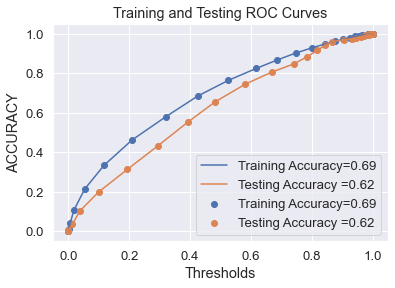

In [55]:
from sklearn.metrics import roc_curve, auc,classification_report,confusion_matrix
train_fpr,train_tpr,thresholds=roc_curve(y_train,clf.predict_proba(x_train_w2v)[:,1])
test_fpr,test_tpr,thresholds=roc_curve(y_test,clf.predict_proba(x_test_w2v)[:,1])
import matplotlib.pyplot as plt
plt.plot(train_fpr,train_tpr,label="Training Accuracy="+str(round(auc(train_fpr, train_tpr),2)))
plt.plot(test_fpr,test_tpr,label="Testing Accuracy ="+str(round(auc(test_fpr, test_tpr),2)))
plt.scatter(train_fpr,train_tpr,label="Training Accuracy="+str(round(auc(train_fpr, train_tpr),2)))
plt.scatter(test_fpr,test_tpr,label="Testing Accuracy ="+str(round(auc(test_fpr, test_tpr),2)))
plt.legend()
plt.xlabel("Thresholds")
plt.ylabel("ACCURACY")
plt.title("Training and Testing ROC Curves")
plt.show()

<AxesSubplot:>

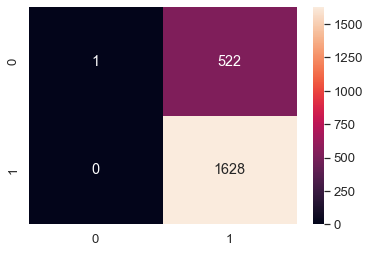

In [58]:
# confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test,clf.predict(x_test_w2v)),annot=True,fmt="d")

<AxesSubplot:>

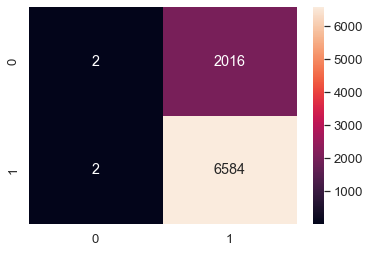

In [59]:
sns.heatmap(confusion_matrix(y_train,clf.predict(x_train_w2v)),annot=True,fmt="d")

In [60]:
# classification report
print(classification_report(y_test,clf.predict(x_test_w2v)))

              precision    recall  f1-score   support

         0.0       1.00      0.00      0.00       523
         1.0       0.76      1.00      0.86      1628

    accuracy                           0.76      2151
   macro avg       0.88      0.50      0.43      2151
weighted avg       0.82      0.76      0.65      2151

